# Python 버전 확인 및 OpenCV설치

In [0]:
!python --version

Python 3.6.8


In [0]:
!pip install opencv-python==3.4.2.16 && pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 25.0MB 1.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 3.4.7.28
    Uninstalling opencv-python-3.4.7.28:
      Successfully uninstalled opencv-python-3.4.7.28
     |████████████████████████████████| 30.6MB 1.9MB/s 
  Found existing installation: opencv-contrib-python 3.4.3.18
    Uninstalling opencv-contrib-python-3.4.3.18:
      Successfully uninstalled opencv-contrib-python-3.4.3.18


# OpenCV 버전 확인

In [0]:
import cv2
cv2.__version__

'3.4.2'

# 실습 이미지 다운로드

## 이미지 다운로드

In [0]:
!wget https://i.imgur.com/e0h9ppP.jpg
!mv e0h9ppP.jpg barbara.jpg

--2019-10-01 03:36:24--  https://i.imgur.com/e0h9ppP.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.52.193
Connecting to i.imgur.com (i.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102227 (100K) [image/jpeg]
Saving to: ‘e0h9ppP.jpg’

e0h9ppP.jpg         100%[===================>]  99.83K  --.-KB/s    in 0.02s   

2019-10-01 03:36:24 (4.75 MB/s) - ‘e0h9ppP.jpg’ saved [102227/102227]



# 실습코드1: 이미지 히스토그램

## 흑백 이미지 히스토그램

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [0]:
def histogram(img):
    bins = np.zeros(256, np.int32)
#     bins = np.zeros(16, np.int32)

    height, width = img.shape

    for i in range(0, height):
        for j in range(0, width):
            bins[img[i][j]] += 1
#             bins[int(img[i][j]/16)] += 1
  
    bins = bins/(width*height)

    return bins

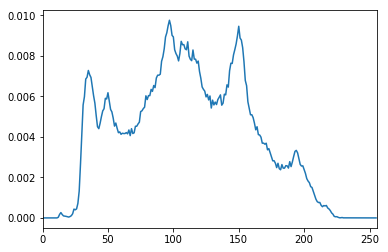

In [0]:
img = cv2.imread('barbara.jpg',0)

#Histogram 함수를 이용
bins = histogram(img)

plt.plot(bins)
plt.xlim([0,256])
# plt.xlim([0,15])

plt.show()

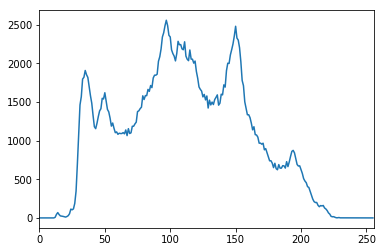

In [0]:
#OpenCV를 이용
##cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])##

hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()

## 칼라 이미지 히스토그램

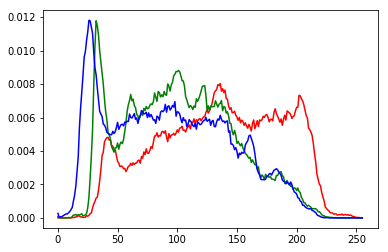

In [0]:
#color image histogram 표현
color_img = cv2.imread('barbara.jpg')
RGB_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

R_bins = histogram(RGB_img[:,:,0])
G_bins = histogram(RGB_img[:,:,1])
B_bins = histogram(RGB_img[:,:,2])

plt.plot(R_bins, 'r-', G_bins, 'g-', B_bins,'b-')
plt.show()

## Histogram 10 bins로 표현하기

In [0]:
def histogram_10bins(img):
    bins = np.zeros(10, np.int32)

    height, width = img.shape
    # height = img.shape[0]
    # width = img.shape[1]

    for i in range(0, height):
        for j in range(0, width):
            bins[int(img[i][j]/26)] += 1

#     pyplot.plot(bins)
#     pyplot.xlim([0,10])
#     pyplot.show()

    return bins

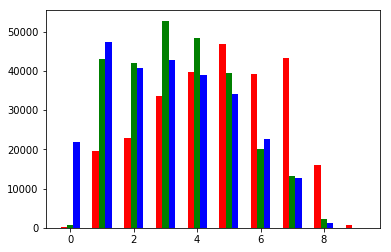

In [0]:
#color image histogram 표현
color_img = cv2.imread('barbara.jpg')
RGB_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

R_bins = histogram_10bins(RGB_img[:,:,0])
G_bins = histogram_10bins(RGB_img[:,:,1])
B_bins = histogram_10bins(RGB_img[:,:,2])

x = np.arange(len(R_bins))
width = 0.2
plt.bar(x - width, R_bins, width, color='r')
plt.bar(x , G_bins, width, color='g')
plt.bar(x + width, B_bins, width, color='b')

plt.show()

# 실습코드2: Histogram Equalization (히스토그램 평활화)

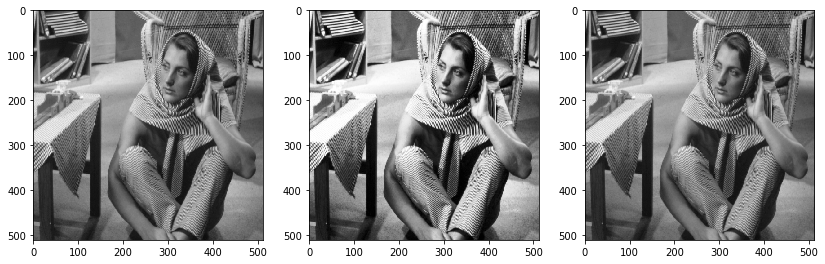

In [0]:
img = cv2.imread('barbara.jpg',0)
equalized_img = cv2.equalizeHist(img)

stretched_img = (img - hist.min())/(hist.max()-hist.min())*255

plt.figure(figsize=(14,7))

plt.subplot(131)
plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.imshow(equalized_img, cmap='gray')

plt.subplot(133)
plt.imshow(stretched_img, cmap='gray')

plt.show()

hist = cv2.calcHist([img],[0],None,[256],[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()


# 실습코드3: Threshold (임계값 설정)

thresh: 113 ret: 112.0


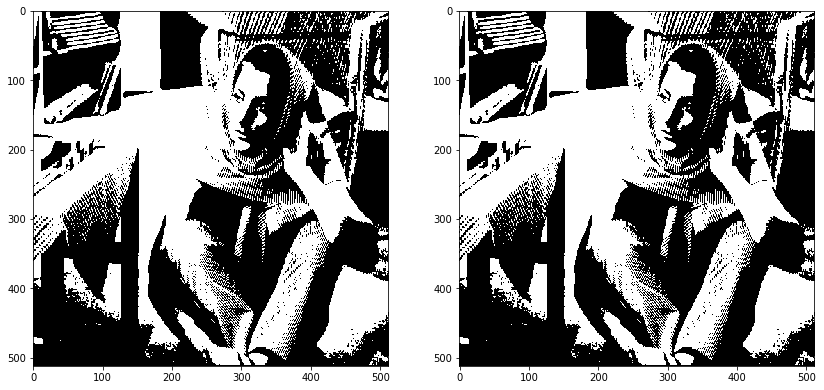

In [0]:
img = cv2.imread('barbara.jpg',0)

#histogram and CDF
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
CDF = hist_norm.cumsum()

#initialization
bins = np.arange(256)
fn_min = np.inf
thresh = -1

#Otsu algorithm operation
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = CDF[i],CDF[255]-CDF[i] # cum sum of classes

    if q1 == 0:
        q1 = 0.00000001
    if q2 == 0:
        q2 = 0.00000001
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print( "thresh: {} ret: {}".format(thresh, ret) )

binary_img = np.zeros((img.shape[1], img.shape[0]), np.uint8)

for i in range(0,img.shape[1]):
    for j in range(0,img.shape[0]):
        if img[i][j]<thresh:
            binary_img[i][j] = 0
        else:
            binary_img[i][j]  = 255;


plt.figure(figsize=(14,7))

plt.subplot(121)
plt.imshow(otsu,cmap='gray')

plt.subplot(122)
plt.imshow(binary_img,cmap='gray')

plt.show()